In [1]:
import nltk
import numpy as np
import pandas as pd
from textblob import TextBlob

/Users/hasanenesguray/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import pandas as pd
data = pd.read_csv('amazon_final.csv')
data

,Unnamed: 0,productCode,star,review
0,0,B09G95MCDT,4,\nGood to have monthly payments but so quickly...
1,1,B09G95MCDT,5,"\nBefore we start, apologies for the long revi..."
2,2,B09G95MCDT,5,\nNice looking phone there seems to be a lot o...
3,3,B09G95MCDT,5,\nNew product and prompt delivery!\n
4,4,B09G95MCDT,4,\nPhone is as expected from an iPhone 13. Not ...
...,...,...,...,...
13222,13222,B08L5PVZ9Y,5,\nSo happy with this product and delivery was ...
13223,13223,B08L5PVZ9Y,5,\nGood item\n
13224,13224,B08L5PVZ9Y,5,\nI bought this phone for my other half after ...
13225,13225,B08L5PVZ9Y,5,\nLovely phone dose what I need it to do\n


In [3]:
data.dropna(axis=0,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13120 entries, 0 to 13226
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   13120 non-null  int64 
 1   productCode  13120 non-null  object
 2   star         13120 non-null  int64 
 3   review       13120 non-null  object
dtypes: int64(2), object(2)
memory usage: 512.5+ KB


In [4]:
data.review

0        \nGood to have monthly payments but so quickly...
1        \nBefore we start, apologies for the long revi...
2        \nNice looking phone there seems to be a lot o...
3                     \nNew product and prompt delivery!\n
4        \nPhone is as expected from an iPhone 13. Not ...
                               ...                        
13222    \nSo happy with this product and delivery was ...
13223                                        \nGood item\n
13224    \nI bought this phone for my other half after ...
13225           \nLovely phone dose what I need it to do\n
13226                                    \nPerfect phone\n
Name: review, Length: 13120, dtype: object

In [5]:
data.star.value_counts(normalize=True)

5    0.661128
1    0.131860
4    0.105335
3    0.058155
2    0.043521
Name: star, dtype: float64

In [6]:
# Removing the reviews given 3 stars because they indicate neither positive nor negative mood.
data = data[data.star!=3]

# 4/5 Star --> Positive, 1/2 Star --> Negative
data['sentiment'] = data['star'].apply(lambda x: (x>=4 and 'Positive') or 'Negative')
data = data[['sentiment','star','review']]
data.head(10)

/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_22174/745778418.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sentiment'] = data['star'].apply(lambda x: (x>=4 and 'Positive') or 'Negative')


,sentiment,star,review
0,Positive,4,\nGood to have monthly payments but so quickly...
1,Positive,5,"\nBefore we start, apologies for the long revi..."
2,Positive,5,\nNice looking phone there seems to be a lot o...
3,Positive,5,\nNew product and prompt delivery!\n
4,Positive,4,\nPhone is as expected from an iPhone 13. Not ...
5,Positive,5,\nSon's present from Santa\n
6,Positive,4,\niPhones have a quality feel to them. This on...
7,Positive,5,\nMy previous phone was an iPhone X and when i...
8,Positive,5,"\niPhone, bought as present so can’t really wr..."
9,Positive,5,\nSecond one l have bought for my wife good pr...


In [7]:
# Checking the row number after deducting the reviews with 3 stars
len(data)

12357

In [8]:
# A large part of our dataset consists of comments showing positive mood
data.sentiment.value_counts(normalize=True)

Positive    0.81379
Negative    0.18621
Name: sentiment, dtype: float64

In [9]:
import re
import string

# Removing the \n expressions from the reviews
data['review'] = data['review'].str.replace("\n","")
# Removing the numbers from the reviews
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
# Removing the punctations from the reviews ve converting all letters to lowercase
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower()) 

data['review'] = data.review.map(alphanumeric).map(punc_lower)
data

,sentiment,star,review
0,Positive,4,good to have monthly payments but so quickly o...
1,Positive,5,before we start apologies for the long review...
2,Positive,5,nice looking phone there seems to be a lot of ...
3,Positive,5,new product and prompt delivery
4,Positive,4,phone is as expected from an iphone not muc...
...,...,...,...
13222,Positive,5,so happy with this product and delivery was sp...
13223,Positive,5,good item
13224,Positive,5,i bought this phone for my other half after th...
13225,Positive,5,lovely phone dose what i need it to do


In [10]:
#Other stemmer methods can be tried
from nltk.stem import SnowballStemmer
from nltk.stem import LancasterStemmer
from nltk.stem import ISRIStemmer
from nltk.stem import PorterStemmer
from nltk.stem import RegexpStemmer
from nltk.stem import RSLPStemmer

sbs = SnowballStemmer(language='english')

In [11]:
def stemmer(text):
    text = [sbs.stem(word) for word in text.split(' ')]
    text = " ".join(text)
    return text

data.review = data.review.apply(stemmer)
data.review

0        good to have month payment but so quick out of...
1        befor we start  apolog for the long review  bu...
2        nice look phone there seem to be a lot of tin ...
3                         new product and prompt deliveri 
4        phone is as expect from an iphon    not much e...
                               ...                        
13222    so happi with this product and deliveri was sp...
13223                                            good item
13224    i bought this phone for my other half after th...
13225                 love phone dose what i need it to do
13226                                        perfect phone
Name: review, Length: 12357, dtype: object

In [12]:
from textblob import TextBlob

def correct(text):
    text = [str(TextBlob(word).correct()) for word in text.split(' ')]
    text = " ".join(text)
    print(text)
    return text

data.review = data.review.apply(correct)
data.review

0        good to have month payment but so quick out of...
1        before we start  apology for the long review  ...
2        nice look phone there seem to be a lot of tin ...
3                          new product and prompt deliver 
4        phone is as expect from an upon    not much ex...
                               ...                        
13222    so happy with this product and deliver was spo...
13223                                            good item
13224    i bought this phone for my other half after th...
13225                 love phone dose what i need it to do
13226                                        perfect phone
Name: review, Length: 12357, dtype: object

In [14]:
X = data.review
y = data.sentiment

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

cv1 = CountVectorizer(stop_words='english') # Removing the stop words

# Applying CountVectorizer to Train and Test datasets
X_train_cv1 = cv1.fit_transform(X_train)
X_test_cv1  = cv1.transform(X_test)

pd.DataFrame(X_train_cv1.toarray(), columns=cv1.get_feature_names_out()).head()

,ab,abbandonato,abbastanza,abbiamo,abbildungsleistung,abbondantement,abgefragt,abgegeben,abgelaufen,abgeranzt,...,übersättigt,übertrag,übertragen,übertroffen,überwiegt,überzeugt,überzogen,überzogenen,übrigen,üppige
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
# Tokenizing using the 2-Way N-Gram method
cv2 = CountVectorizer(ngram_range=(1,2), binary=True, stop_words='english')

X_train_cv2 = cv2.fit_transform(X_train)
X_test_cv2  = cv2.transform(X_test)

pd.DataFrame(X_train_cv2.toarray(), columns=cv2.get_feature_names_out()).head()

,ab,ab compatible,ab dem,ab der,ab minute,ab portrait,ab und,ab word,abbandonato,abbandonato andros,...,überzogen,überzogen die,überzogen saber,überzogenen,überzogenen peri,übrigen,übrigen das,übrigen verlässlich,üppige,üppige war
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [20]:
# DataFrame created by splitting into words
lr.fit(X_train_cv1, y_train)
y_pred_cv1 = lr.predict(X_test_cv1)

In [21]:
# DataFrame created using the 2-bin N-Gram method
lr.fit(X_train_cv2, y_train)
y_pred_cv2 = lr.predict(X_test_cv2)

In [22]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def conf_matrix(actual, predicted):
    plt.figure(figsize=[8,8])
    cm = confusion_matrix(actual, predicted)
    sns.heatmap(cm, xticklabels=['Predicted Negative', 'Predicted Positive'], 
                yticklabels=['Actual Negative', 'Actual Positive'], annot=True,
                fmt='d', annot_kws={'fontsize':35}, cmap="YlGnBu", square=True);

    accuracy = accuracy_score(actual, predicted)
    precision = precision_score(actual, predicted, pos_label='Negative', zero_division=1)
    recall = recall_score(actual, predicted, pos_label='Negative', zero_division=1)
    f1 = f1_score(actual, predicted, pos_label='Negative', zero_division=1)
    # pos_label parametresi precision, recall ve f1 score unu görmek istediğimiz labelı soruyor
    # zero_division parametresi 0'a bölme işlemini gerçekleşirse uyarı verip vermeyeceğini soruyor (1=uyarı verme)

    cm_results = [accuracy, precision, recall, f1]
    return cm_results

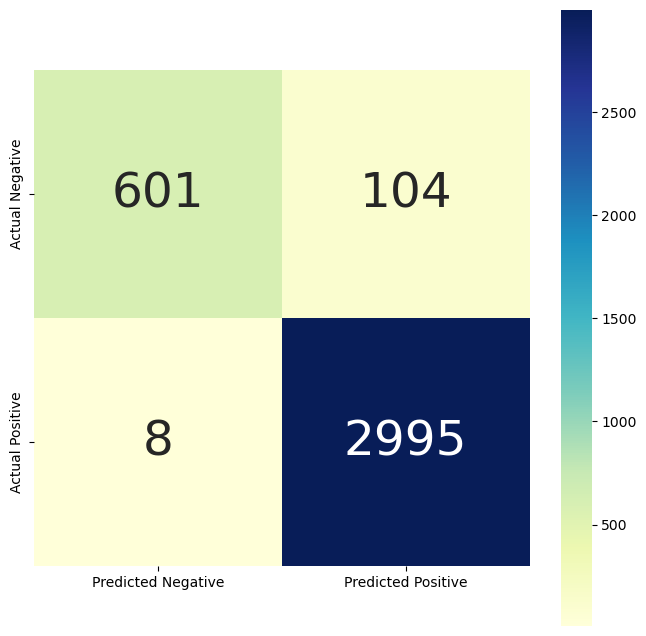

In [23]:
# The error matrix we obtained from our first model
cm1 = conf_matrix(y_test, y_pred_cv1)

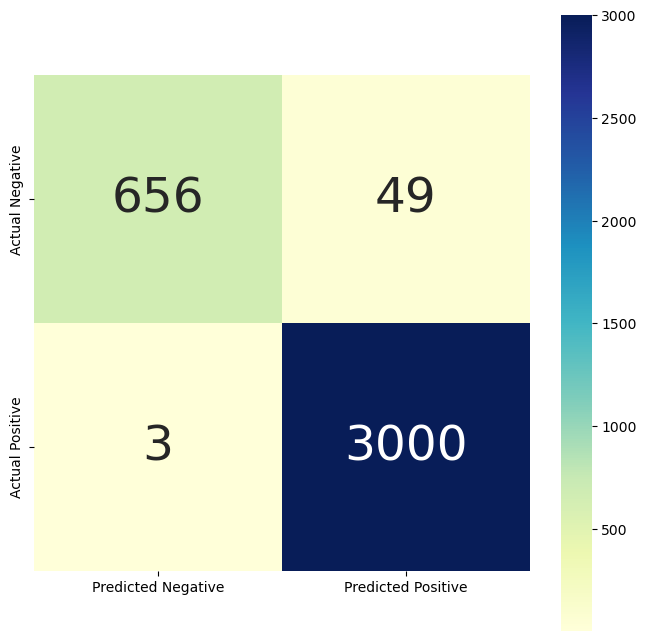

In [24]:
# The error matrix we obtained from our second model
cm2 = conf_matrix(y_test, y_pred_cv2)

In [25]:
results = pd.DataFrame(list(zip(cm1, cm2)))
results = results.set_index([['Accuracy', 'Precision', 'Recall', 'F1 Score']])
results.columns = ['LR(Word)-CV', 'LR(N-Grams)-CV']
results

,LR(Word)-CV,LR(N-Grams)-CV
Accuracy,0.969795,0.985976
Precision,0.986864,0.995448
Recall,0.852482,0.930496
F1 Score,0.914764,0.961877


In [26]:
# Training our models with the MultinomialNB algorithm
from sklearn.naive_bayes import MultinomialNB

mnb1 = MultinomialNB()
mnb1.fit(X_train_cv1, y_train)

mnb2 = MultinomialNB()
mnb2.fit(X_train_cv2, y_train)

y_pred_cv1_mnb = mnb1.predict(X_test_cv1)
y_pred_cv2_mnb = mnb2.predict(X_test_cv2)

In [27]:
# Training our models with the BernoulliNB algorithm
from sklearn.naive_bayes import BernoulliNB

bnb1 = BernoulliNB()
bnb1.fit(X_train_cv1, y_train)

bnb2 = BernoulliNB()
bnb2.fit(X_train_cv2, y_train)

y_pred_cv1_bnb = bnb1.predict(X_test_cv1)
y_pred_cv2_bnb = bnb2.predict(X_test_cv2)

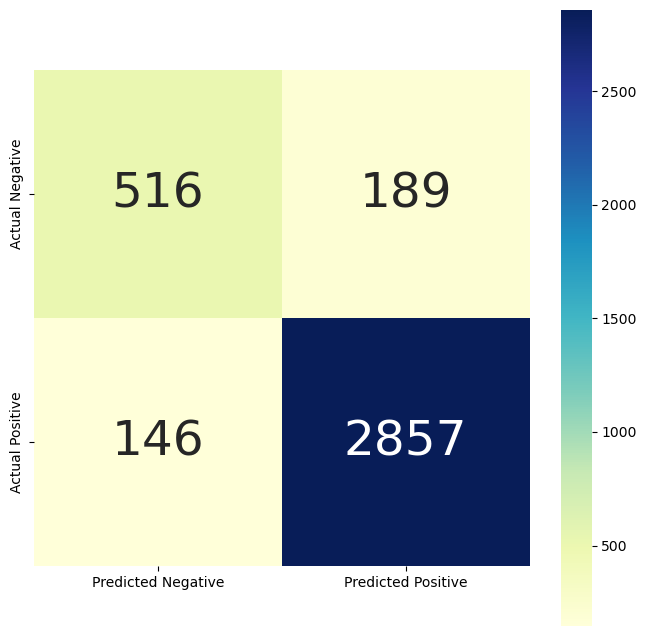

In [28]:
# MultinomialNB & Word
cm3 = conf_matrix(y_test, y_pred_cv1_mnb)

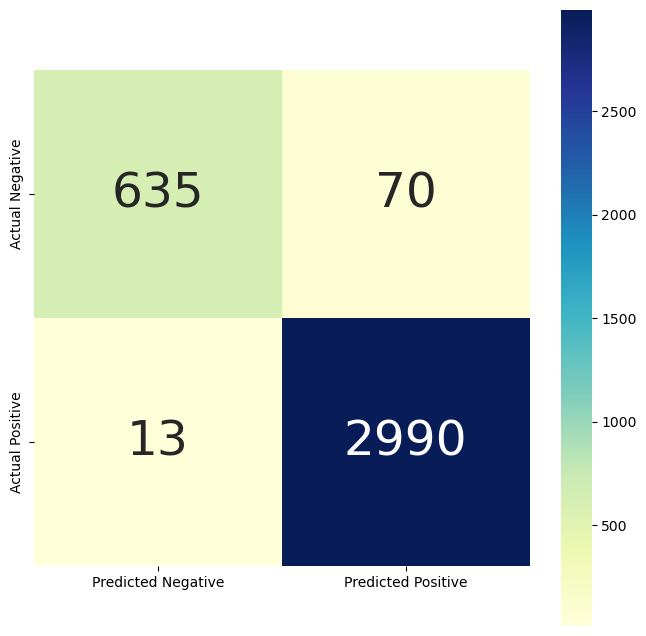

In [29]:
# MultinomialNB & 2-way N-Grams
cm4 = conf_matrix(y_test, y_pred_cv2_mnb)

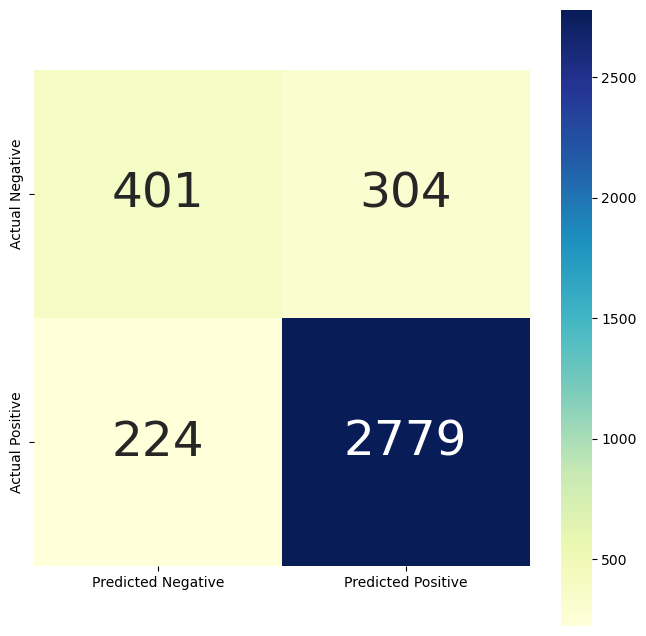

In [30]:
# BernoulliNB & Word
cm5 = conf_matrix(y_test, y_pred_cv1_bnb)

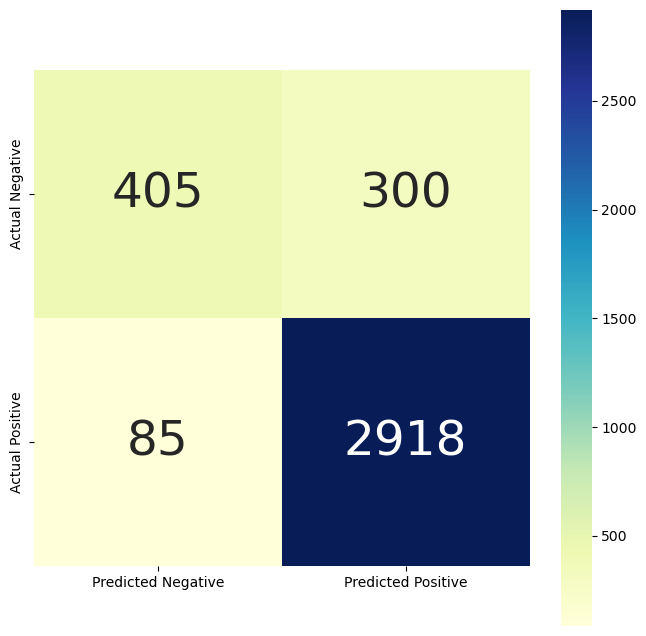

In [31]:
# BernoulliNB & 2-way N-Grams
cm6 = conf_matrix(y_test, y_pred_cv2_bnb)

In [32]:
results_nb = pd.DataFrame(list(zip(cm3, cm4, cm5, cm6)))
results_nb = results_nb.set_index([['Accuracy', 'Precision', 'Recall', 'F1 Score']])
results_nb.columns = ['MNB(Word)-CV', 'MNB(N-Grams)-CV', 'BNB(Word)-CV', 'BNB(N-Grams)-CV']
results_nb

results = pd.concat([results, results_nb], axis=1)
results

,LR(Word)-CV,LR(N-Grams)-CV,MNB(Word)-CV,MNB(N-Grams)-CV,BNB(Word)-CV,BNB(N-Grams)-CV
Accuracy,0.969795,0.985976,0.909655,0.977616,0.857605,0.896170
Precision,0.986864,0.995448,0.779456,0.979938,0.641600,0.826531
Recall,0.852482,0.930496,0.731915,0.900709,0.568794,0.574468
F1 Score,0.914764,0.961877,0.754938,0.938655,0.603008,0.677824
